In [67]:
from PIL import Image
import numpy as np
ar = np.zeros((24,2118,2135))
for i in range(1,13,1):
    if i <=9:
        st = "0"+ str(i)
    else:
        st = str(i)
    img = Image.open('awifs_ndvi_2017'+st+'_15_1_clipped.tif')
    img.seek(0)
    for x in range(0,2118):
        for y in range(0,2135):
            ar[i-1][x][y] = img.getpixel((x, y))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [56]:
def get_cv_image(image):
    pil_image = image.convert('RGB')
    open_cv_image = np.array(pil_image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, :-1].copy() 
    return open_cv_image

In [46]:

for i in range(1,13,1):
    if i <=9:
        st = "0"+ str(i)
    else:
        st = str(i)
    img = Image.open('awifs_ndvi_2018'+st+'_15_1_clipped.tif')
    img.seek(0)
    for x in range(0,2118):
        for y in range(0,2135):
            ar[i-1 + 12][x][y] = img.getpixel((x, y))

    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [47]:
    imgs = ar
    num_images = imgs.shape[0]
    dim_x = imgs.shape[1]
    dim_y = imgs.shape[2]

    diff = np.zeros((num_images-1,dim_x,dim_y))

    for i in range(num_images - 1):
        diff[i] = imgs[i+1] - imgs[i]
    x=[]
    y=[]
    threshold = 70
    count = 0
    for k in range(0,23,1):
        count = 0
        for i in range(dim_x):
            for j in range(dim_y):
                if diff[k][i][j] > threshold:
                    count+=1

        y.append(count)
        x.append(k)
        print(k,count)
            

0 6746
1 168
2 16967
3 83256
4 956
5 1556
6 9020
7 1885822
8 4106
9 1099
10 93592
11 27935
12 7051
13 25
14 32980
15 30908
16 0
17 499
18 38572
19 1085007
20 709283
21 74
22 64619


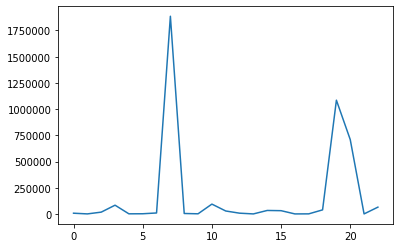

In [48]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

In [ ]:
import cv2

In [58]:
# def load_images():
#     images=[]
#     for i in range(1,13,1):
#         if i <=9:
#             st = "0"+ str(i)
#         else:
#             st = str(i)
#         img = cv2.imread('awifs_ndvi_2017'+st+'_15_1_clipped.tif')
#         images.append(img)

#     for i in range(1,13,1):
#         if i <=9:
#             st = "0"+ str(i)
#         else:
#             st = str(i)
#         img = cv2.imread('awifs_ndvi_2018'+st+'_15_1_clipped.tif')
#         images.append(img)
#     return images
images = imgs
# for i in imgs:
#     print(get_cv_image(i).shape)
#     images.append(get_cv_image(i))

In [66]:
def preprocess():
    #images = load_images()
    images = imgs
    preprocessed = []
    for i in range(len(images)):
        temp = images[i]#[:, :, 0]
        #cv2.imshow("Preprocessed", temp)	
        preprocessed.append(temp[:, :, 0])
    preprocessed_array = np.array(preprocessed)
    return preprocessed_array

24 2135 2118


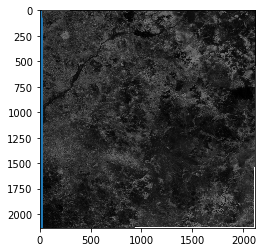

here [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] [1887863, 4097607, 3598232, 2269922, 3173624, 2660015, 2954387, 39780, 1727236, 3346647, 2018566, 2233862, 1383856, 4395303, 3452823, 1841680, 4353286, 3527075, 2498953, 643099, 840012, 4102043, 1734084]


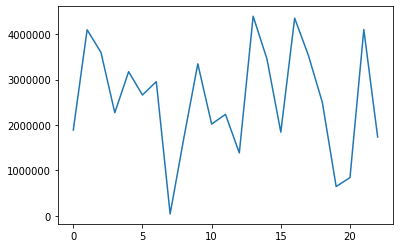

In [65]:
def find_harvest():
    imgs = preprocess()
    
    #print(imgs[0][300][300],imgs[0][300][300])
    num_images = imgs.shape[0]
    dim_x = imgs.shape[1]
    dim_y = imgs.shape[2]
    print(num_images, dim_x, dim_y)
    diff = np.zeros((num_images-1,dim_x,dim_y))
    plt.imshow(imgs[7], cmap="gray")
    plt.show()
    j=0
    for i in range(0, num_images-1 ,1):
        diff[j] = (( imgs[i+1]) - (imgs[i]))
        j+=1

    x = []
    y = []
    threshold = 150
    count = 0
    for k in range(0,23,1):
        count = 0
        for i in range(dim_x):
            for j in range(dim_y):
                if diff[k][i][j] > threshold:
                    count+=1
        y.append(count)
        x.append(k)
    print("here",x,y)
    plt.plot(x,y)
    plt.show()

find_harvest()
            

In [64]:
    
#     num_images = imgs.shape[0]
#     print(num_images)
#     dim_x = imgs.shape[1]
#     dim_y = imgs.shape[2]

#     diff = np.zeros((num_images-1,dim_x,dim_y))

#     for i in range(0, int(num_images/2) ,2):
#         diff[i] = (imgs[i+1] + imgs[i]) - (imgs[i+2]+imgs[i+3])

#     x = []
#     y = []
#     threshold = 70
#     count = 0
#     for k in range(0,23,1):
#         count = 0
#         for i in range(dim_x):
#             for j in range(dim_y):
#                 if diff[k][i][j] > 70:
#                     count+=1
#         y.append(count)
#         x.append(k)
    #imgs = ar
    num_images = imgs.shape[0]
    dim_x = imgs.shape[1]
    dim_y = imgs.shape[2]

    diff = np.zeros((num_images-1,dim_x,dim_y))

    for i in range(num_images - 1):
        diff[i] = imgs[i+1] - imgs[i]
    x=[]
    y=[]
    threshold = 70
    count = 0
    for k in range(0,23,1):
        count = 0
        for i in range(dim_x):
            for j in range(dim_y):
                if diff[k][i][j] > threshold:
                    count+=1

        y.append(count)
        x.append(k)
        print(k,count)
    print(x,y)
    plt.plot(x,y)
    plt.show()

0 6746
1 168
2 16967
3 83256
4 956
5 1556
6 9020
7 1885822
8 4106
9 1099
10 93592
11 27935
12 7051
13 25
14 32980
15 30908
16 0
17 499
18 38572
19 1085007
20 709283
21 74
22 64619
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] [6746, 168, 16967, 83256, 956, 1556, 9020, 1885822, 4106, 1099, 93592, 27935, 7051, 25, 32980, 30908, 0, 499, 38572, 1085007, 709283, 74, 64619]


In [63]:
print(diff[10].shape)

(2118, 2135)


In [8]:
import cv2 as cv
import numpy as np
path = r"C:\Users\Public\Pictures\Sample Pictures\Hydrangeas.jpg"
img = cv.imread("awifs_ndvi_201701_15_1_clipped.tif")
normalizedImg = np.zeros((2118, 2135))
normalizedImg = cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)
#cv.imshow(normalizedImg)

In [12]:
im = cv.resize(normalizedImg, (1050, 1610)) 

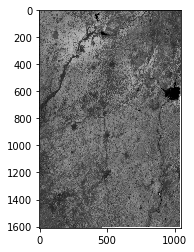

In [13]:
import matplotlib.pyplot as plt
plt.imshow(im, cmap="gray")
plt.show()

In [6]:
from PIL import Image  
newsize = (300, 300) 
im1 = normalizedImg.resize(newsize) 

In [28]:
normalizedImg = np.zeros((2118, 2135))
normalizedImg = cv.normalize(newimg,  normalizedImg, 0, 255, cv.NORM_MINMAX)

In [9]:

newimg = np.zeros((211,213))
for i in range(0,211,1):
    for j in range(0,213,1):
        s=0
        for k in range(i*10, i*10+10,1):
            for m in range(j*10,j*10 + 10, 1):
                s = s+ar[0][k][m]
        newimg[i][j] = s/100

In [27]:

newimg = np.zeros((211,213))

for i in range(0,211,1):
    for j in range(0,213,1):
        s=0
        for k in range(i*10, i*10+10,1):
            for m in range(j*10,j*10 + 10, 1):
                s = s+ar[0][k][m]
        newimg[i][j] = s/100

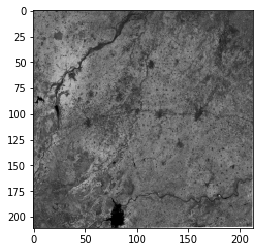

In [10]:
plt.imshow(newimg, cmap="gray")
plt.show()

In [11]:
arr = np.zeros((12,2118,2135))
for i in range(1,13,1):
    if i <=9:
        st = "0"+ str(i)
    else:
        st = str(i)
    img = Image.open('awifs_ndvi_2018'+st+'_15_1_clipped.tif')
    img.seek(0)
    for x in range(0,2118):
        for y in range(0,2135):
            arr[i-1][x][y] = img.getpixel((x, y))
            width, height = img.size
    print(width,height)
    print(i)

2118 2135
1
2118 2135
2
2118 2135
3
2118 2135
4
2118 2135
5
2118 2135
6
2118 2135
7
2118 2135
8
2118 2135
9
2118 2135
10
2118 2135
11
2118 2135
12


In [43]:
x =np.array([1,2,3,4,5,6,7,8,9,10,11,12])

In [76]:
print(ar.shape)
print(ar[0].shape)

(12, 2118, 2135)
(2118, 2135)


In [84]:
x = ar[0,50,:]
y = ar[0,:,50]

z = ar[0]

In [85]:
print(x.shape)
print(y.shape)
print(z.shape)

(2135,)
(2118,)
(2118, 2135)


In [ ]:
a = x.reshape(2135,1

In [86]:

ax.scatter3D(x.reshape(2135,1), y.reshape(2118,1), z.reshape(2135,2118), cmap='Greens');

ValueError: shape mismatch: objects cannot be broadcast to a single shape

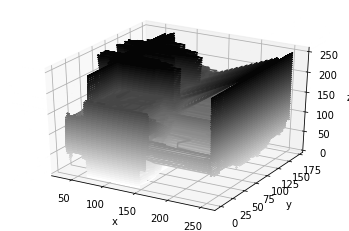

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


TypeError: Input z must be a 2D array.

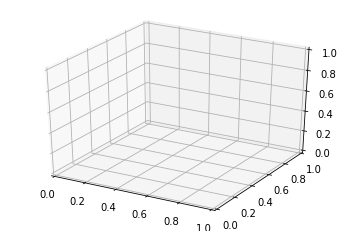

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(ar[0,50,:],ar[0,50,:],ar[0,50,:], 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [12]:
print(ar[:,80,90])

[111. 117.  59.  49.  90.  73.  63.  25.  85.  86.  68. 129.]


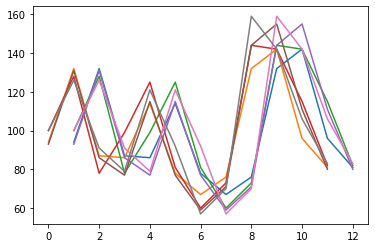

In [35]:
st=648
en=650
for x in range(st,en,1):
    for y in range(st,en,1):
        if y%500==0:
            print(y)
        plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],ar[:,x,y],ar[:,x,y])
        #plt.plot([13,14,15,16,17,18,19,20,21,22,23,24],arr[:,x,y],ar[:,x,y])

In [68]:
np.sum(ar[:,80,900])

0.0

In [12]:
for i in range(4
              :
    try:
        img.seek(0)
        print(img.getpixel( (0, 0)),end=" ")
            
    except EOFError:
        # Not enough frames in img
        break

255 255 255 255 

In [18]:
import gdal
from gdalconst import * 

ModuleNotFoundError: No module named 'gdal'